# The goal of the project is to learn from the historical data of advertisement clicks using machine learning and create a model to Predict who is going to click on the Advertisement on a website in future based on the user behaviour and user profile.

In below project I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios. You can use this flow as a template to solve any supervised ML classification problem.

The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Converting data to numeric for ML
* Trying multiple classification algorithms
* Selecting the best Model


Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

Data Description
This data set contains the following features:

* VistID: The id for the user visit on website
* Time_Spent: Average time spent by user on site in minutes
* Age: User age in years
* Area_Income: Average Income of geographical area of user
* Internet_Usage: Average minutes a day user spent on the internet
* Ad_Topic: Headline of the advertisement
* Country_Name: Country of user
* City_Code: City of user
* Male: Whether or not user was male
* Time_Period: Time at which consumer clicked on Ad
* Weekday: Name of the day
* Month: Name of the months
* Year: Which year the data is collected
* Clicked: 0 means not clicked and 1 means that user clicked the Ad.

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the dataset
df=pd.read_csv("Ad click data.csv")
print('No. of duplicate',df.shape)
df=df.drop_duplicates()
print('No. of duplicate after cleaning',df.shape)

No. of duplicate (6657, 14)
No. of duplicate after cleaning (6657, 14)


In [4]:
df.columns

Index(['VistID', 'Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage',
       'Ad_Topic', 'Country_Name', 'City_code', 'Male', 'Time_Period',
       'Weekday', 'Month', 'Year', 'Clicked'],
      dtype='object')

# Basic Data Exploration
There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [5]:
df.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [6]:
df.describe(include='all')

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657,6657,6657,6657,6657,6657,6657,6657.0,6657.000000
unique,NaN,NaN,NaN,NaN,NaN,30,237,9,2,6,7,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,product_22,Canada,City_1,No,Evening,Friday,January,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,266,46,2559,3571,1266,986,988,NaN,NaN
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [8]:
df.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* VistID: Qualitative. Rejected. This column does not affect the ad click
* Time_Spent: Continuous. Selected.
* Age: Continuous. Selected.
* Area_Income: Continuous. Selected.
* Internet_Usage: Continuous. Selected.
* Ad_Topic: Categorical. Selected.
* Country_Name: Qualitative. Rejected. This column has very high cardinality
* City_Code: Categorical. Selected.
* Male: Categorical. Selected.
* Time_Period: Categorical. Selected.
* Weekday: Categorical. Selected.
* Month: Categorical. Selected.
* Year: Qualitative. Rejected. This column does not affect the ad click.
* Clicked: Categorical. Selected. This is the Target Variable!

In [9]:
#removing useless column
dropcolumn=['VistID','Country_Name','Year']
df.drop(dropcolumn,axis=1,inplace= True)
df.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


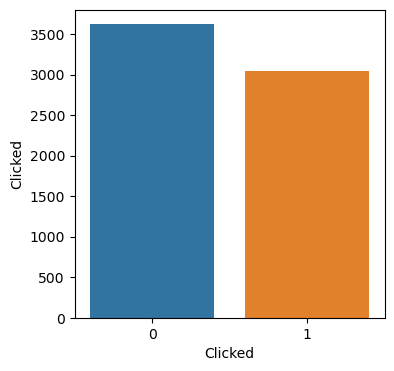

In [10]:
# target variable
plt.figure(figsize=(4,4))
sns.barplot(data=df,x='Clicked',y='Clicked',estimator='size')
plt.show()

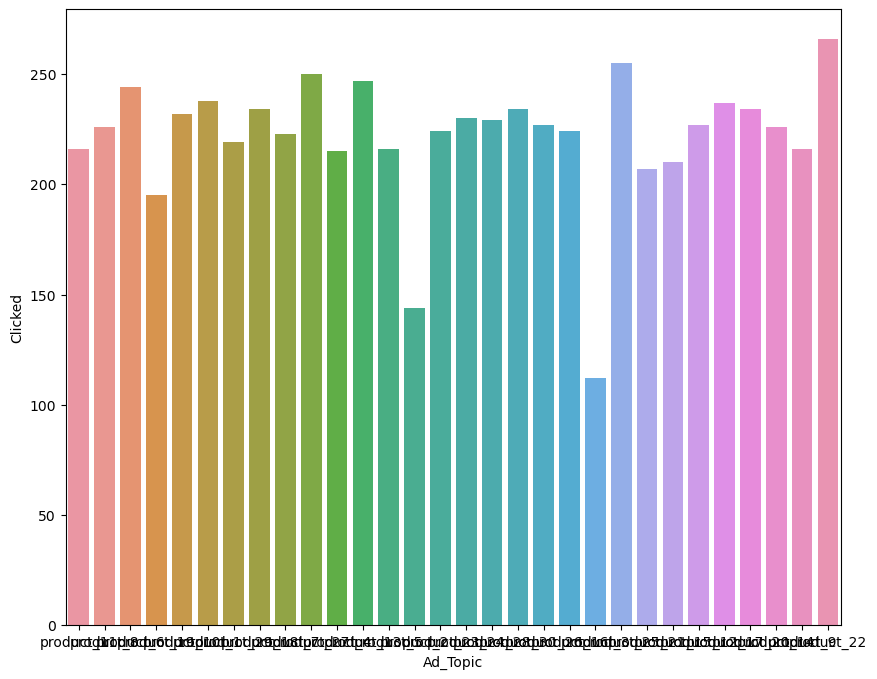

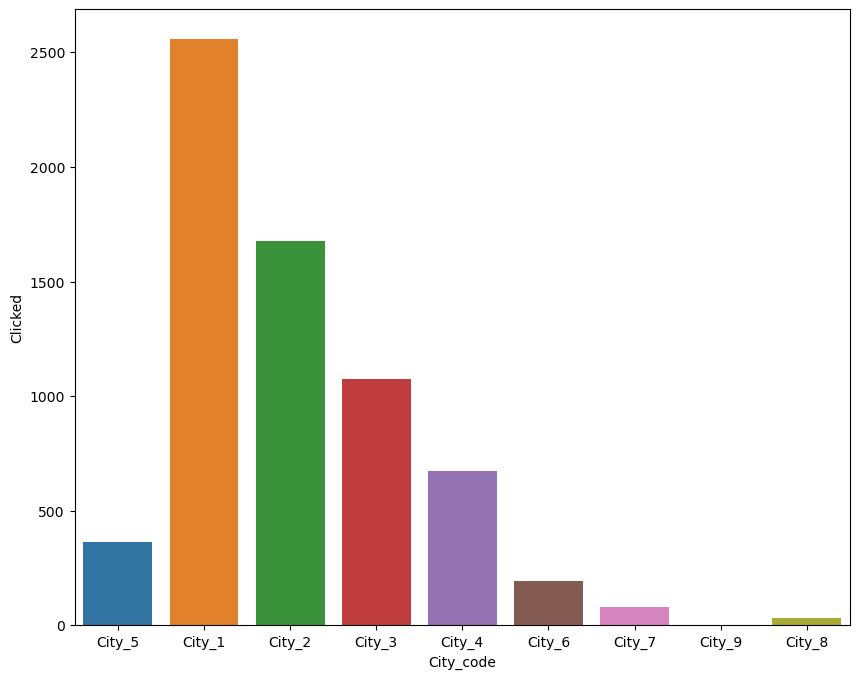

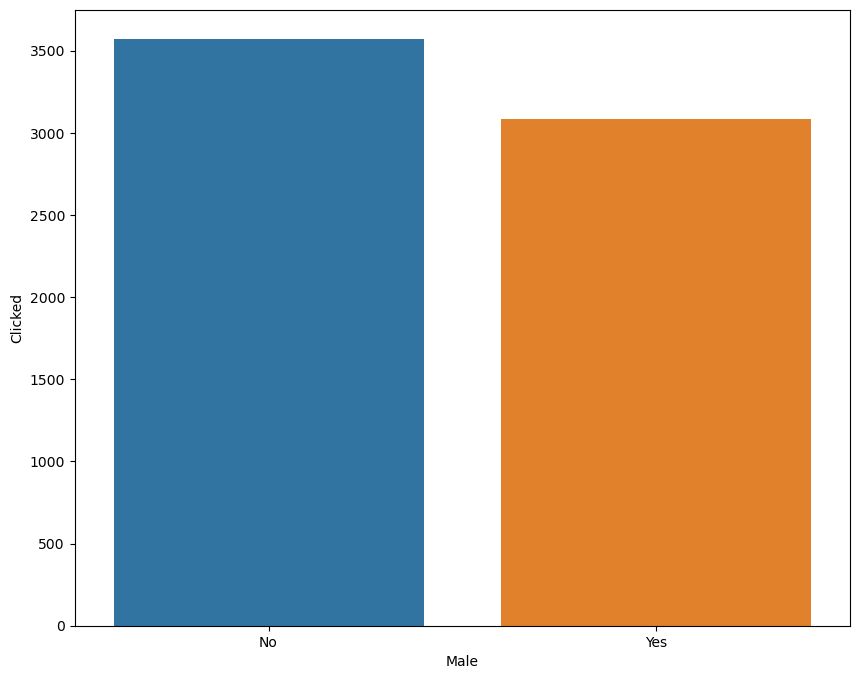

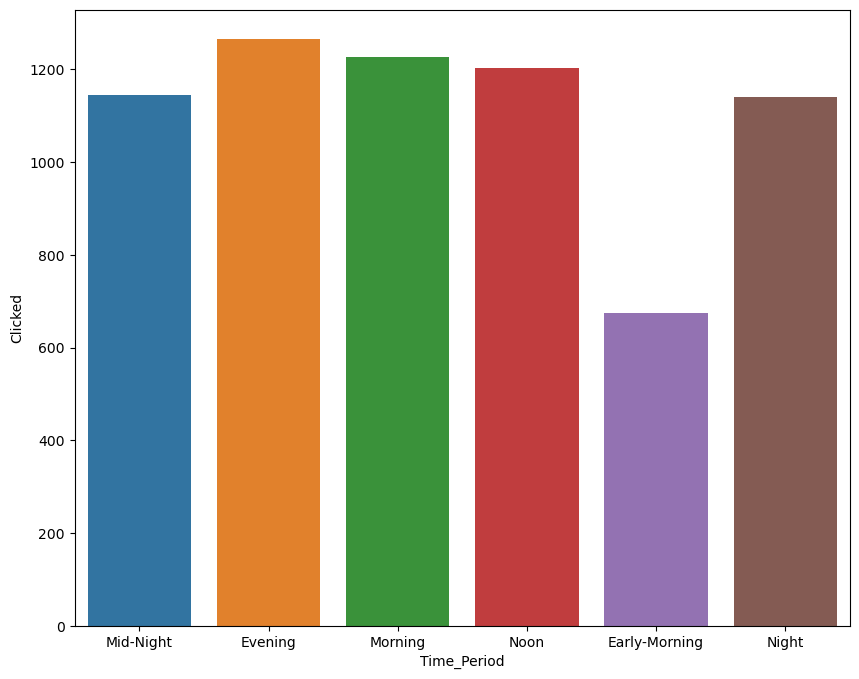

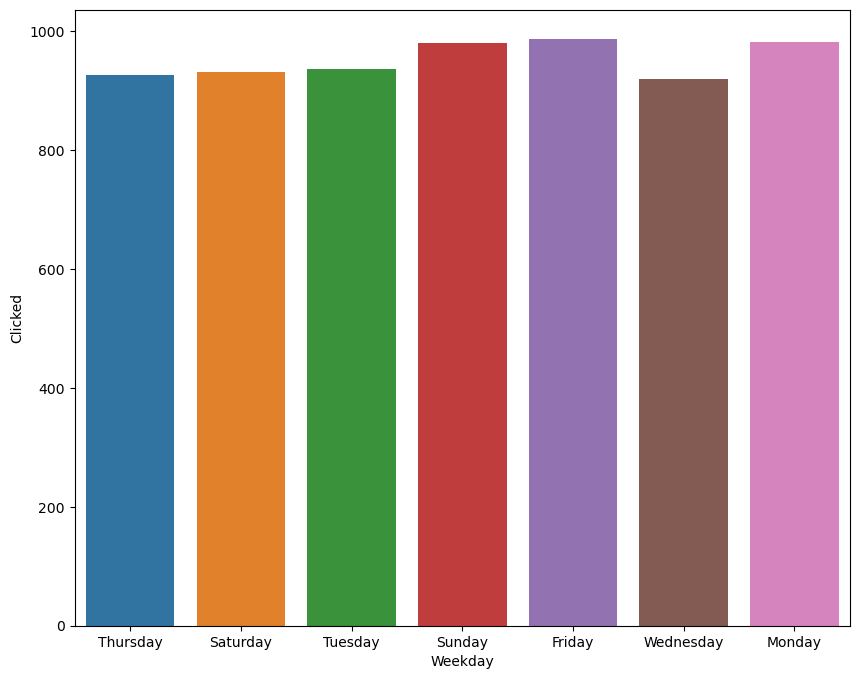

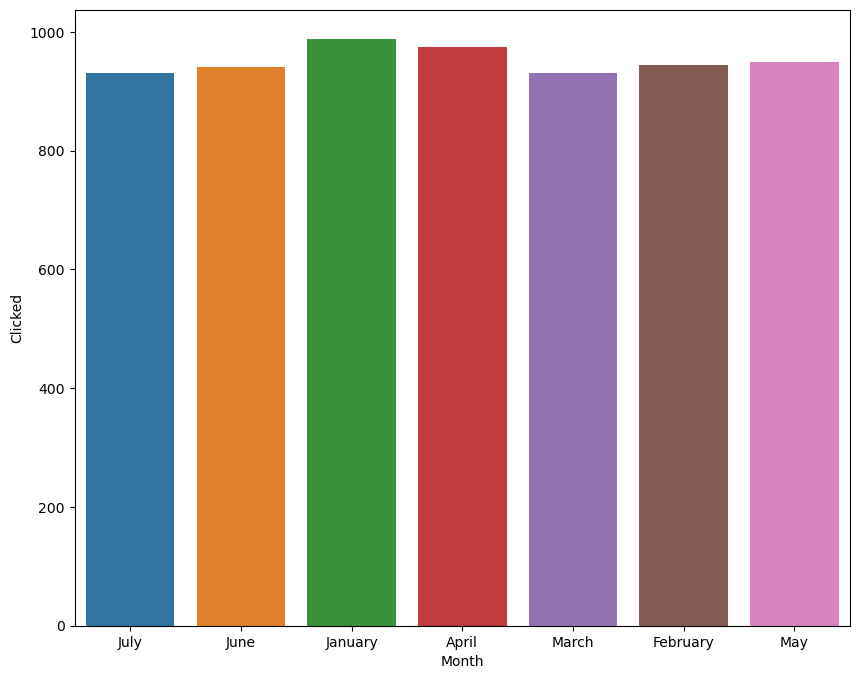

In [11]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for 
# multiple columns at once
# we are defining our own function for the same

# no outlier

CatagoricalData=['Ad_Topic','City_code','Male','Time_Period','Weekday','Month']

for col in CatagoricalData:
    plt.figure(figsize=(10,8))
    sns.barplot(data=df,x=col,y='Clicked',estimator='size')
    plt.show()

# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "Weekday" and "Month" column. Where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns have satisfactory distribution for machine learning.

Selected Categorical Variables: All the categorical variables are selected for further analysis.

"Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"

array([[<Axes: title={'center': 'Time_Spent'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Avg_Income'}>,
        <Axes: title={'center': 'Internet_Usage'}>]], dtype=object)

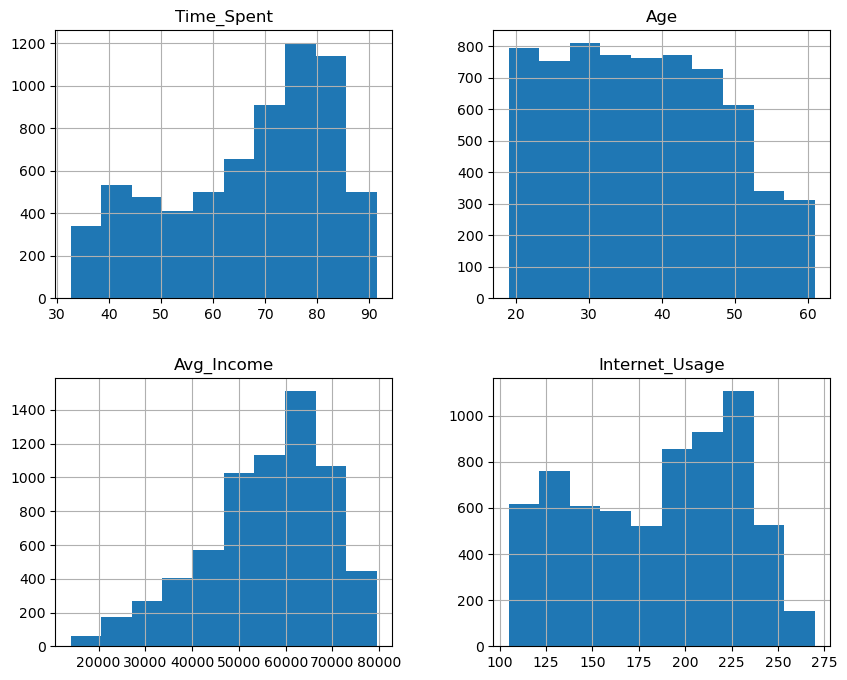

In [12]:
# Plotting histograms of multiple columns together
ContinuousData=['Time_Spent','Age','Avg_Income','Internet_Usage']
df.hist(ContinuousData,figsize=(10,8))

# Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Time_Spent", there are around 1200 rows in data that has a value between 70 to 75.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

Time_Spent : Selected.
Age: Selected.
Avg_Income: Selected. Slightly negative skewed distribution, acceptable.
Internet_Usage: Selected.

Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Clicked           0
dtype: int64


<Axes: >

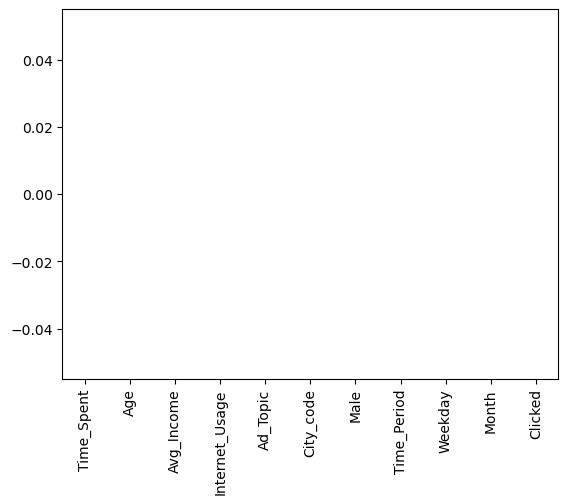

In [13]:
# searching for null value
print(df.isnull().sum())
df.isnull().sum().plot(kind='bar')

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

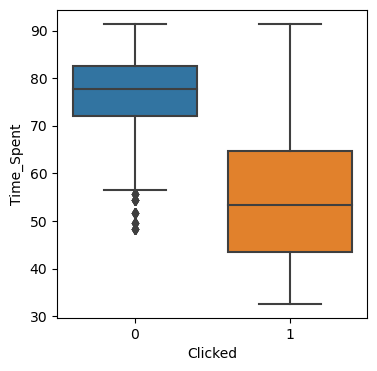

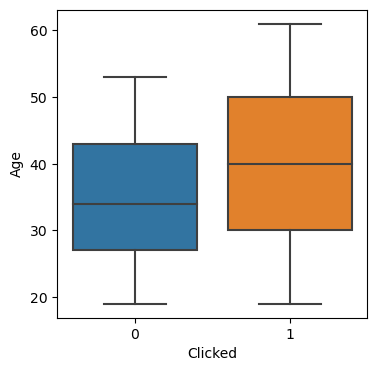

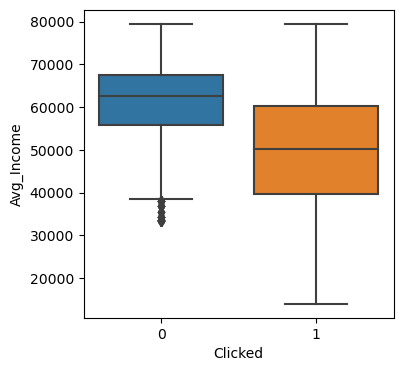

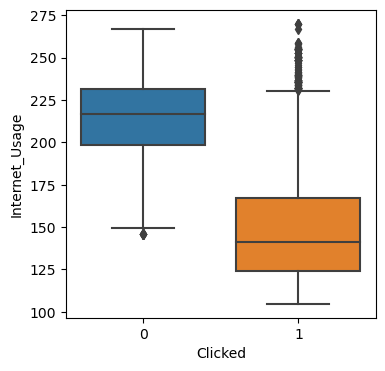

In [14]:
for col in ContinuousData:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=df,x='Clicked',y=col)
    plt.show()

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor       variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [15]:
from scipy.stats import f_oneway
 
seletedlist=[]

for col in ContinuousData:
    group=df.groupby('Clicked')[col].apply(list)
    anovaresult= f_oneway(*group)
    
    if(anovaresult[1]<0.05):
        print(col,'is correlated |p-value: ',anovaresult[1])
        seletedlist.append(col)
    else:
        print(col,'is not correlated |p-value: ',anovaresult[1])
print(seletedlist)  

Time_Spent is correlated |p-value:  0.0
Age is correlated |p-value:  6.40789044460054e-91
Avg_Income is correlated |p-value:  0.0
Internet_Usage is correlated |p-value:  0.0
['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']


# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

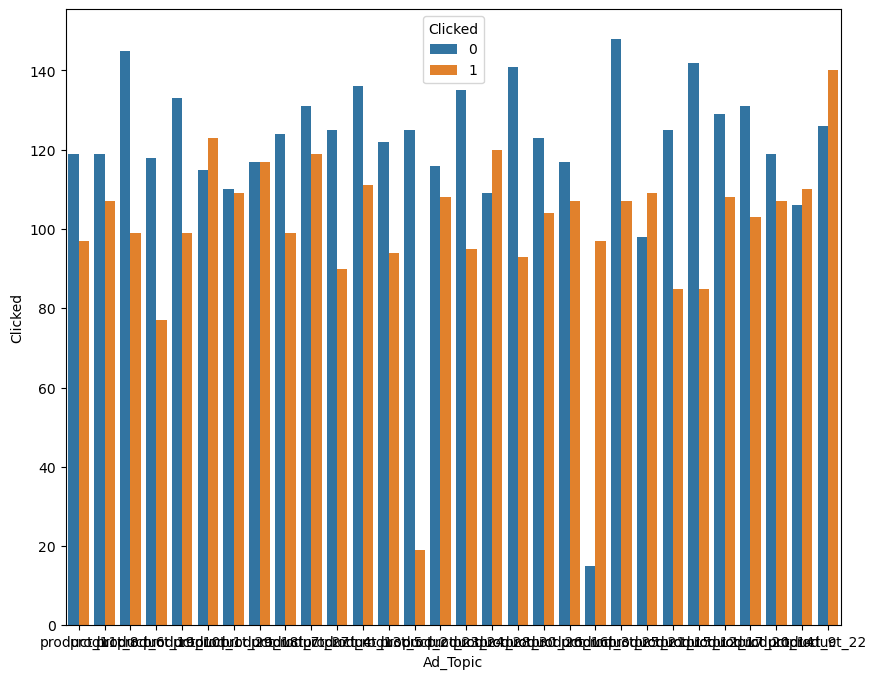

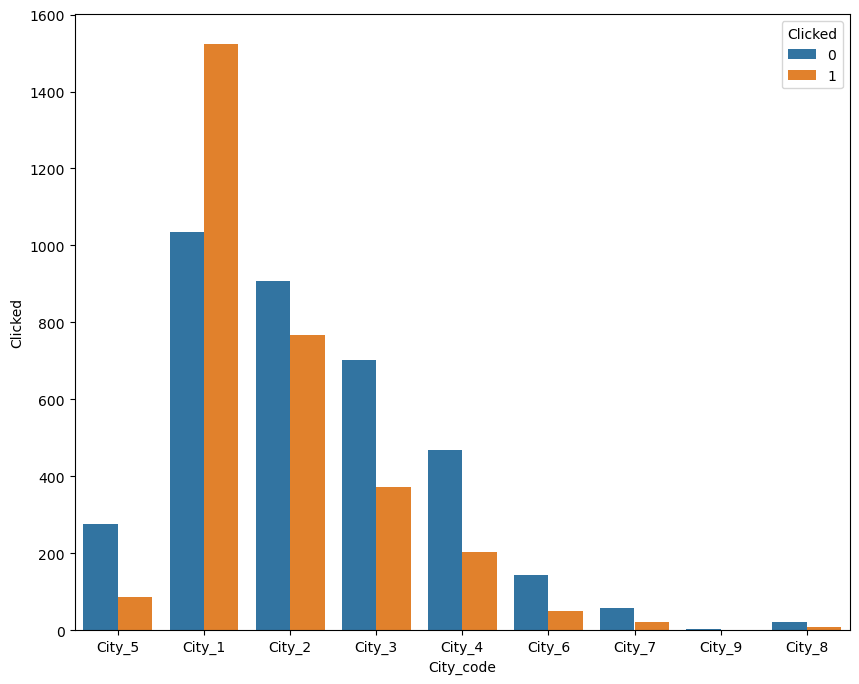

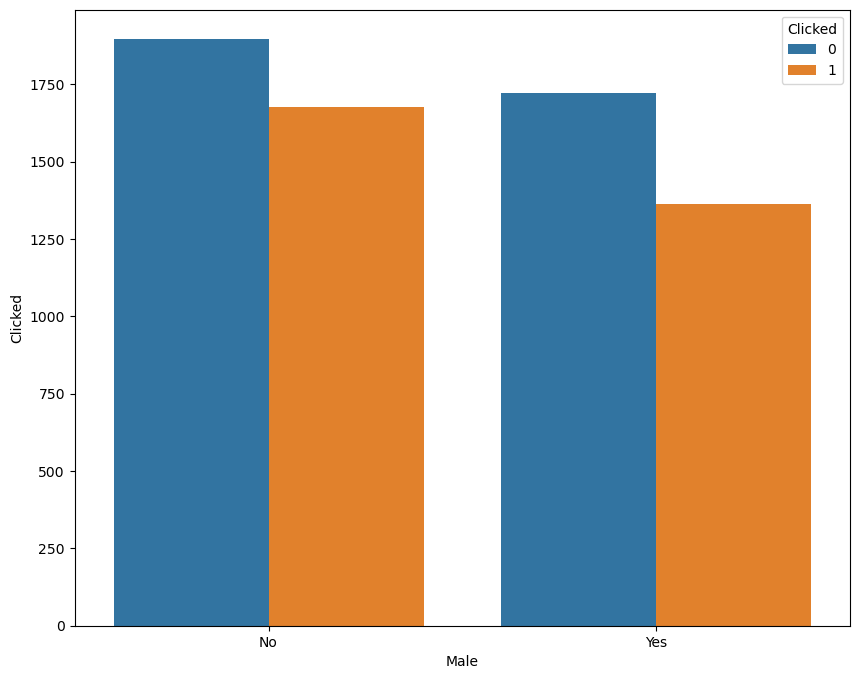

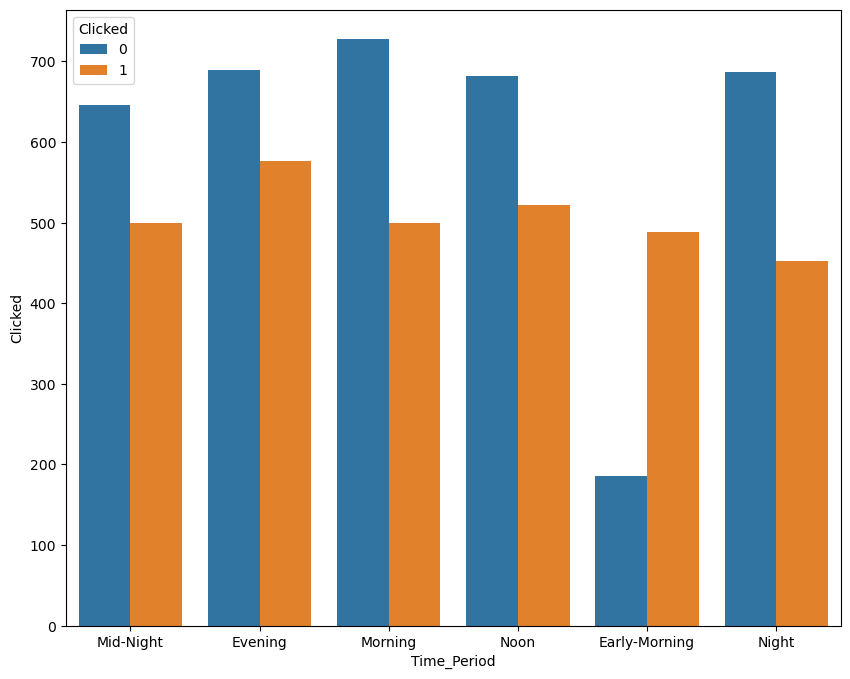

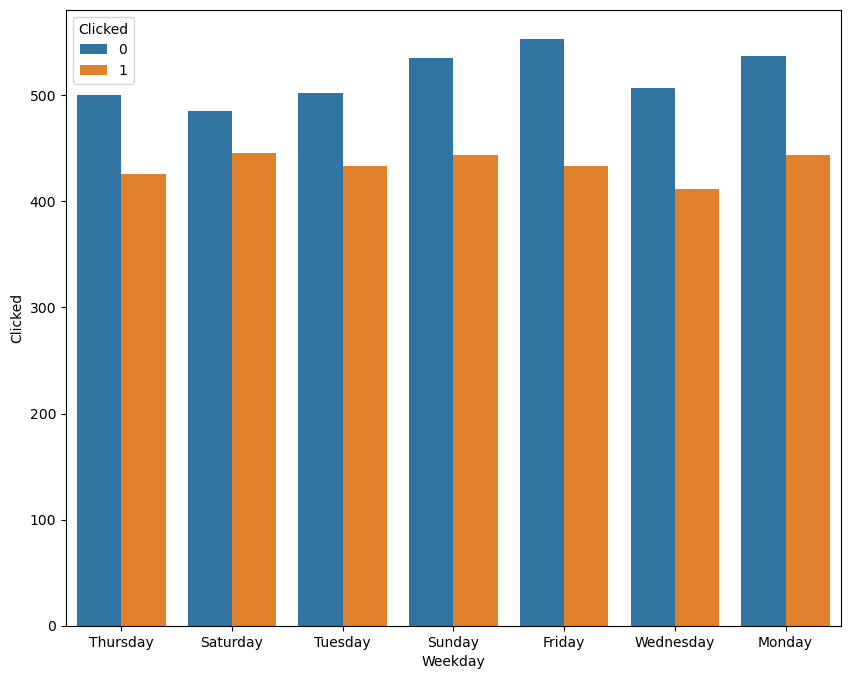

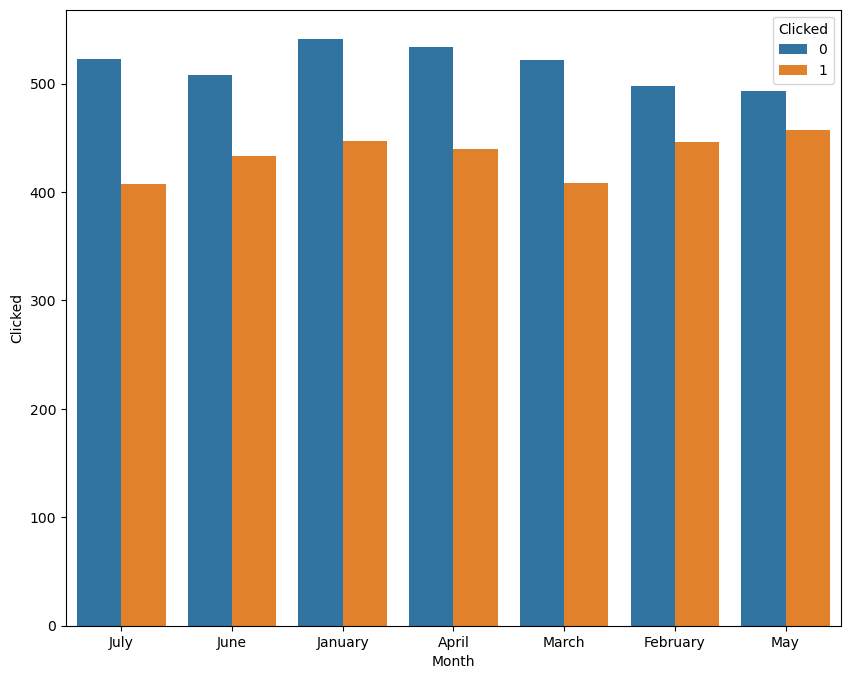

In [16]:
CatagoricalData=['Ad_Topic','City_code','Male','Time_Period','Weekday','Month']

for col in CatagoricalData:
    plt.figure(figsize=(10,8))
    sns.barplot(data=df,x=col,y='Clicked',hue='Clicked',estimator='size')
    plt.show()

# Relationship exploration: Categorical Vs Categorical -- Chi-square test¶
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [17]:
from scipy.stats import chi2_contingency

seletedlist=[]
for col in CatagoricalData:
    crosstabresult=pd.crosstab(index=df['Clicked'],columns=df[col])
    chi2result=chi2_contingency(crosstabresult)
    if(chi2result[1] < 0.05):
        print(' is correlated | p-value: ',chi2result[1])
        seletedlist.append(col)
    else:
        print('is not is correlated | p-value: ',chi2result[1])
print(seletedlist)       

 is correlated | p-value:  1.2676573604736464e-24
 is correlated | p-value:  2.6667953391697526e-88
 is correlated | p-value:  0.02695171301745074
 is correlated | p-value:  4.465745015735695e-47
is not is correlated | p-value:  0.7226317326250824
is not is correlated | p-value:  0.4229049097263303
['Ad_Topic', 'City_code', 'Male', 'Time_Period']


# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [18]:
finalcol=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage',
         'Ad_Topic', 'City_code', 'Male', 'Time_Period']
data_ml=df[finalcol]
data_ml.head()
data_ml.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


# List of steps performed on predictor variables before data can be used for machine learning

Converting each Ordinal Categorical columns to numeric
Converting Binary nominal Categorical columns to numeric using 1/0 mapping
Converting all other nominal categorical columns to numeric using pd.get_dummies()

In [19]:
data_ml['Male'].replace({'Yes':1, 'No':0}, inplace=True)
data_ml= pd.get_dummies(data_ml,dtype= int)
data_ml['Clicked']=df['Clicked']
data_ml.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Ad_Topic_product_1,Ad_Topic_product_10,Ad_Topic_product_11,Ad_Topic_product_12,Ad_Topic_product_13,...,City_code_City_7,City_code_City_8,City_code_City_9,Time_Period_Early-Morning,Time_Period_Evening,Time_Period_Mid-Night,Time_Period_Morning,Time_Period_Night,Time_Period_Noon,Clicked
0,87.97,43,55901.12,185.46,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,51.63,50,39132.00,176.73,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,82.37,38,57032.36,210.60,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,62.06,45,48868.00,190.05,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,77.66,31,61608.23,204.86,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [20]:
data_ml.columns

Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 

In [21]:
target='Clicked'
predictor=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']
X=data_ml[predictor].values
y=data_ml[target].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=37)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4659, 50)
(1998, 50)
(4659,)
(1998,)


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=5,penalty='l2', solver='newton-cg')
LOR=model.fit(X_train,y_train)
y_LOR=LOR.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test,y_LOR))
print(metrics.confusion_matrix(y_test,y_LOR))
print('F1_score',round(metrics.f1_score(y_test,y_LOR,average='weighted'),5))

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(model, X , y, cv=10, scoring='f1_weighted')
Accuracy_Values=Accuracy_Values*100
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1066
           1       0.95      0.88      0.91       932

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998

[[1021   45]
 [ 113  819]]
F1_score 0.92065

Accuracy values for 10-fold Cross Validation:
 [93.84464079 88.77376379 92.02827687 93.52741076 93.06846346 94.1270953
 94.12456784 94.13105492 93.37056409 93.82175727]

Final Average Accuracy of the model: 93.08


# Decision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3,criterion='entropy')
DTC=model.fit(X_train,y_train)
y_DTC=DTC.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test,y_DTC))
print(metrics.confusion_matrix(y_test,y_DTC))
F1_score=metrics.f1_score(y_test,y_DTC,average='weighted')
print('F1_score',round(metrics.f1_score(y_test,y_DTC,average='weighted'),5))

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(model, X , y, cv=10, scoring='f1_weighted')
Accuracy_Values=Accuracy_Values*100
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1066
           1       0.97      0.86      0.91       932

    accuracy                           0.92      1998
   macro avg       0.93      0.92      0.92      1998
weighted avg       0.93      0.92      0.92      1998

[[1045   21]
 [ 135  797]]
F1_score 0.92136

Accuracy values for 10-fold Cross Validation:
 [92.47811606 88.43730254 91.3823952  93.21761078 92.16435    93.06197634
 93.32939302 93.823731   93.04756374 93.6560285 ]

Final Average Accuracy of the model: 92.46


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=3, n_estimators=100,criterion='gini')
RFC=model.fit(X_train,y_train)
y_RFC=RFC.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test,y_RFC))
print(metrics.confusion_matrix(y_test,y_RFC))
F1_score=metrics.f1_score(y_test,y_RFC,average='weighted')
print('F1_score',round(metrics.f1_score(y_test,y_RFC,average='weighted'),5))

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RFC, X , y, cv=10, scoring='f1_weighted')
Accuracy_Values=Accuracy_Values*100
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1066
           1       0.97      0.86      0.92       932

    accuracy                           0.93      1998
   macro avg       0.93      0.92      0.92      1998
weighted avg       0.93      0.93      0.92      1998

[[1045   21]
 [ 128  804]]
F1_score 0.92494

Accuracy values for 10-fold Cross Validation:
 [93.36362954 89.1855371  93.05125341 93.04741249 93.03932751 94.1133437
 92.8901254  93.35948039 93.63815049 92.73861234]

Final Average Accuracy of the model: 92.84


# Random Forest is the best model below is the testing result

In [119]:
testdata=pd.DataFrame(data=X_test,columns=predictor)
testdata[target]=y_test
testdata[('prediction'+target)]=np.round(y_RFC)
testdata=testdata.iloc[:, -2:]
testdata.head(10)

,Clicked,predictionClicked
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0
